# Compare loss functions

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import os
import sys
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')
sns.set()

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

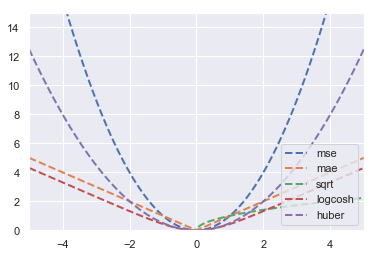

In [91]:
from keras import backend as K
from keras import losses as k_losses
from scipy.special import huber as cp_huber

k = 5 # scale

x = np.linspace(-k, k, 100)
z = K.variable(np.zeros(100))

mse = lambda x: np.square(x)
mae = lambda x: np.abs(x)
sqrt = lambda x: np.sqrt(x)
logcosh = lambda x, k: K.eval(x + K.softplus(-k * x) - K.log(k))
huber = lambda x, delta: cp_huber(delta, x)
cos = lambda x: np.cos(x)
sin = lambda x: np.sin(x * np.pi - np.pi / 2) / 2 + 0.5

fig, ax = plt.subplots()
ax.plot(x, mse(x), '--', linewidth=2, label='mse')
ax.plot(x, mae(x), '--', linewidth=2, label='mae')
ax.plot(x, sqrt(x), '--', linewidth=2, label='sqrt')
ax.plot(x, logcosh(K.variable(x), K.variable(2)), '--', linewidth=2, label='logcosh')
# ax.plot(x, cos(x), '--', linewidth=2, label='cos')
# ax.plot(x, sin(x), '--', linewidth=2, label='sin')
line3, = ax.plot(x, huber(x, 5), '--', linewidth=2, label='huber')
ax.legend(loc='lower right')
ax.set_ylim(0,k * 3)
ax.set_xlim(-k,k)
plt.show()